In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

import util as u
%load_ext autoreload
%autoreload 2

In [3]:
vr = pd.read_csv('Data/video_review.csv')
# pprd = pd.read_csv('Data/play_player_role_data.csv')
# ppd = pd.read_csv('Data/player_punt_data.csv')
# pi = pd.read_csv('Data/play_information.csv')
# gd = pd.read_csv('Data/game_data.csv')

### pull out data for first injury in video_review table

In [4]:
vr.loc[0]

Season_Year                                   2016
GameKey                                          5
PlayID                                        3129
GSISID                                       31057
Player_Activity_Derived                   Tackling
Turnover_Related                                No
Primary_Impact_Type                 Helmet-to-body
Primary_Partner_GSISID                       32482
Primary_Partner_Activity_Derived           Tackled
Friendly_Fire                                   No
Name: 0, dtype: object

In [5]:
ngs_16_pre = pd.read_csv('Data/NGS-2016-pre.csv', parse_dates=['Time'])
ngs_16_pre.sort_values(by='Time', ascending=True, inplace=True)

In [8]:
ngs1 = u.get_play_ngs(5, 3129, ngs_16_pre)
ngs1.reset_index(drop=True, inplace=True)

In [9]:
ngs1.head()

,GSISID,Time,x,y,dis,o,dir,Event
0,32460.0,2016-08-12 02:07:25.100,76.769997,24.270000,0.02,334.989990,313.079987,punt_play
1,31902.0,2016-08-12 02:07:25.100,81.160004,28.850000,0.02,256.940002,340.220001,punt_play
2,32776.0,2016-08-12 02:07:25.100,80.660004,43.320000,0.04,140.419998,293.029999,punt_play
3,32790.0,2016-08-12 02:07:25.100,84.389999,25.889999,0.04,218.240005,308.829987,punt_play
4,31079.0,2016-08-12 02:07:25.100,93.300003,27.129999,0.12,175.570007,265.540009,punt_play


In [10]:
len(ngs1)

5962

Note there is ~ 1 second of data missing for GSISID 31209 around 02:07:40, which is not the player that got injured (31057)

### Calculate distance from x & y

<module 'matplotlib.pyplot' from '/Users/kendra/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

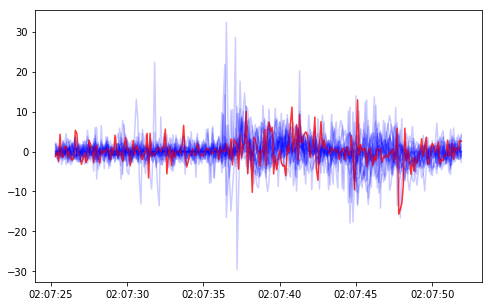

In [31]:
gk, pid, inj_gid = vr.loc[0,['GameKey', 'PlayID', 'GSISID']]

ngs1 = u.calc_accel_play(gk, pid, ngs_16_pre)

u.plot_all_accels(ngs1, inj_gid)

In [32]:
for x in ngs1['GSISID'].unique():
    print(f"{x}, {stats.mode(ngs1[ngs1['GSISID'] == x]['accel'])[0][0]}")

32471.0, 0.0
27718.0, 0.0
32958.0, -13.166705757320107
33064.0, 0.0
32477.0, -0.9143773269654133
32136.0, 0.0
31697.0, -0.9142465209960937
32482.0, 0.0
32489.0, 0.0
31130.0, 0.0
28284.0, -13.607060032890693
31915.0, 0.0
26852.0, 0.0
31079.0, 0.0
32460.0, 0.0
30705.0, 0.0
32519.0, 0.0
32790.0, -13.515318346212846
31902.0, 0.0
31057.0, 0.0
28041.0, 0.0
31209.0, -11.445510748546761
32776.0, 0.0


Most players don't move much

### How far are players from each other?

In [33]:
ngs1.head()

,GSISID,Time,x,y,dis,o,dir,Event,dt,dx,dy,dist,speed,d_speed,accel
46,32471.0,2016-08-12 02:07:25.300,77.699997,21.410000,0.06,350.890015,195.220001,NaN,0.1,-0.030006,-0.059999,0.061342,0.613420,-0.140622,-1.406223
47,27718.0,2016-08-12 02:07:25.300,76.830002,28.520000,0.05,24.270000,75.519997,NaN,0.1,0.040001,-0.020000,0.040894,0.408941,-0.048259,-0.482585
48,32958.0,2016-08-12 02:07:25.300,74.790001,20.740000,0.31,87.949997,176.919998,NaN,0.1,0.040001,-0.300001,0.276749,2.767488,-0.080389,-0.803886
49,33064.0,2016-08-12 02:07:25.300,66.669998,49.450001,0.00,159.669998,90.000000,NaN,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50,32477.0,2016-08-12 02:07:25.300,73.870003,14.300000,0.09,319.679993,59.259998,NaN,0.1,0.080002,0.050000,0.086266,0.862658,0.019623,0.196228


In [68]:
xy_df = ngs1[['GSISID', 'Time', 'x', 'y']]
xy_df['xy'] = xy_df.apply(lambda row: [row.x, row.y], axis=1)
xy_df.drop(columns=['x','y'], inplace=True)

/Users/kendra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/kendra/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [69]:
xy_inj = xy_df[xy_df['GSISID'] == inj_gid]

In [70]:
xy_df = xy_df.merge(xy_inj.drop(columns='GSISID'), how='left', on='Time', copy=False, suffixes=('','_inj_player'))

In [71]:
xy_df.head()

,GSISID,Time,xy,xy_inj_player
0,32471.0,2016-08-12 02:07:25.300,"[77.69999694824219, 21.40999984741211]","[83.37000274658203, 22.32999992370605]"
1,27718.0,2016-08-12 02:07:25.300,"[76.83000183105469, 28.520000457763672]","[83.37000274658203, 22.32999992370605]"
2,32958.0,2016-08-12 02:07:25.300,"[74.79000091552734, 20.739999771118164]","[83.37000274658203, 22.32999992370605]"
3,33064.0,2016-08-12 02:07:25.300,"[66.66999816894531, 49.45000076293945]","[83.37000274658203, 22.32999992370605]"
4,32477.0,2016-08-12 02:07:25.300,"[73.87000274658203, 14.300000190734865]","[83.37000274658203, 22.32999992370605]"


In [72]:
def dist_from_player(row):
    '''gid: int : player GSISID
       xy: list : of x, y coordinates
    '''
    px, py = row['xy']
    ix, iy = row['xy_inj_player']
    d = np.sqrt((px - ix)**2 + (py - iy)**2) * 0.9144
    return d

In [77]:
xy_df['dist_from_player'] = xy_df.apply(lambda row: dist_from_player(row), axis=1)

In [78]:
xy_df.head()

,GSISID,Time,xy,xy_inj_player,dist_from_player
0,32471.0,2016-08-12 02:07:25.300,"[77.69999694824219, 21.40999984741211]","[83.37000274658203, 22.32999992370605]",5.252459
1,27718.0,2016-08-12 02:07:25.300,"[76.83000183105469, 28.520000457763672]","[83.37000274658203, 22.32999992370605]",8.234055
2,32958.0,2016-08-12 02:07:25.300,"[74.79000091552734, 20.739999771118164]","[83.37000274658203, 22.32999992370605]",7.979131
3,33064.0,2016-08-12 02:07:25.300,"[66.66999816894531, 49.45000076293945]","[83.37000274658203, 22.32999992370605]",29.123096
4,32477.0,2016-08-12 02:07:25.300,"[73.87000274658203, 14.300000190734865]","[83.37000274658203, 22.32999992370605]",11.374302


In [82]:
gids = list(xy_df['GSISID'].unique())
gids.remove(inj_gid)

In [89]:
time_of_inj = ngs1.loc[ngs1[ngs1['GSISID'] == inj_gid]['accel'].idxmin(), 'Time']

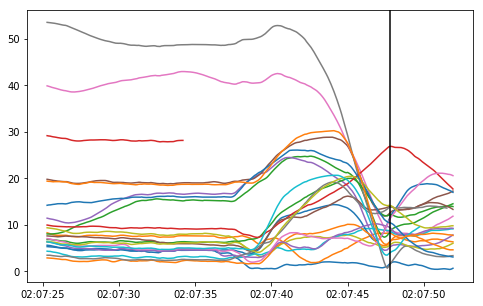

In [90]:
# for x in gids:
# ds = [0] * len(gids) - 2
plt.figure(figsize=(8,5))
for gid in gids:
    df = xy_df[xy_df['GSISID'] == gid]
    plt.plot(df['Time'], df['dist_from_player'])

plt.axvline(time_of_inj, color='k')
    

In [88]:
ngs1.loc[ngs1[ngs1['GSISID'] == inj_gid]['accel'].idxmin(), 'Time']

Timestamp('2016-08-12 02:07:47.800000')